In [2]:
# Importing libraries
import numpy as np
import pandas as pd
# import statsmodels

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import datasets

# Understanding Principal Component Analysis

insipiration from [handson ML's PCA notebook]([https://](https://nbviewer.org/github/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb))

## PCA on iris dataset

In [3]:
# will use iris data for study
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### using sklearn pca

In [5]:
X = pd.DataFrame(iris.data[:, :3], columns=iris['feature_names'][:3])
X['target'] = iris.target

In [6]:
px.scatter_3d(X, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', color='target')

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2'])
X_2d['target'] = X['target']
px.scatter(X_2d, x='PC1', y='PC2', color='target')

In [8]:
pca.explained_variance_ratio_

array([0.92096482, 0.05387996])

### SVD on a matrix

In [9]:
np.random.seed(42)
A = np.random.randn(3,3)
A

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439]])

In [10]:
np.linalg.eigvals(A)

array([ 1.22795686+0.j        , -0.71743524+0.61245434j,
       -0.71743524-0.61245434j])

In [11]:
U, s, Vt = np.linalg.svd(A - A.mean(axis=0))
Vt.T

array([[ 0.63937215, -0.40621625, -0.65283352],
       [ 0.42658049,  0.89380228, -0.13837115],
       [-0.6397127 ,  0.19001539, -0.74475621]])

## PCA on MNIST handwritten numbers dataset

In [12]:
# loading the data
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
mnist.keys()

c:\Users\msing\.conda\envs\ds\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning:

The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.



dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [13]:
mnist.data.shape

(70000, 784)

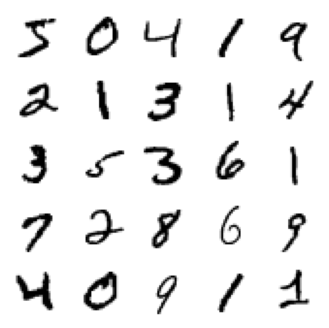

In [14]:
fig, axes = plt.subplots(5, 5, figsize=(4,4))

for i in range(5):
    for j in range(5):
        axes[i, j].imshow(mnist.data[5*i+j].reshape(28,28), cmap='binary')
        axes[i, j].set_axis_off()
    

In [15]:
X_train, X_test = np.split(mnist.data, [60000])
print(X_train.shape, X_test.shape)

y_train, y_test = np.split(mnist.target, [60000])
print(y_train.shape, y_test.shape)

(60000, 784) (10000, 784)
(60000,) (10000,)


### Seeing the effects of PCA on Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
%time rfc.fit(X_train, y_train)

CPU times: total: 18 s
Wall time: 53.5 s


RandomForestClassifier(random_state=42)

In [17]:
from sklearn.metrics import accuracy_score

y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9705

In [18]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_train_reduced.shape

(60000, 154)

In [19]:
X_test_reduced = pca.transform(X_test)


In [20]:

rfc_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
%time rfc_reduced.fit(X_train_reduced, y_train)

CPU times: total: 53.2 s
Wall time: 3min


RandomForestClassifier(random_state=42)

In [21]:
y_pred_ = rfc_reduced.predict(X_test_reduced)
accuracy_score(y_test, y_pred_)

0.9481

for Random Forest Classifier applying PCA reduces the performance and takes much longer

### using t-SNE to viusalize the high dimensional data

In [31]:
from sklearn.manifold import TSNE

X_sample, y_sample = mnist.data[:5000], mnist.target[:5000]

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced = tsne.fit_transform(X_sample)

In [32]:
X_reduced

array([[ 27.29423  , -12.066925 ],
       [  8.205369 , -66.170876 ],
       [ 53.31725  ,  15.1813965],
       ...,
       [-53.820976 ,  -8.090768 ],
       [-32.893517 ,  10.589642 ],
       [-51.583973 ,  -3.6446407]], dtype=float32)

(-77.37604389190673, 66.37906894683837, -89.10994110107421, 83.10984954833984)

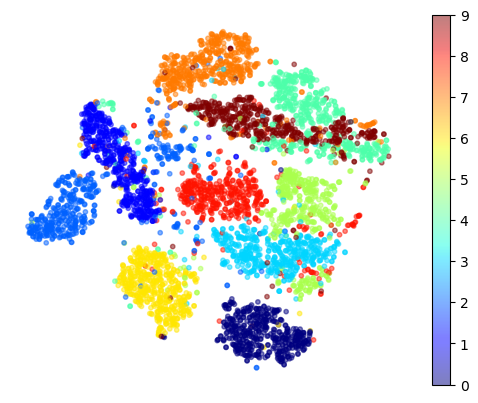

In [39]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_sample.astype(np.int8), cmap='jet', alpha=0.5, s=10)
plt.colorbar()
plt.axis('off')